In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression, make_classification
from sklearn.linear_model import LinearRegression, LogisticRegression


In [18]:
x_class, y_class = make_classification(n_samples=50,n_features=1,n_informative=1,n_redundant=0,
                                       n_classes=2,n_clusters_per_class=1,class_sep=.5,random_state=3)

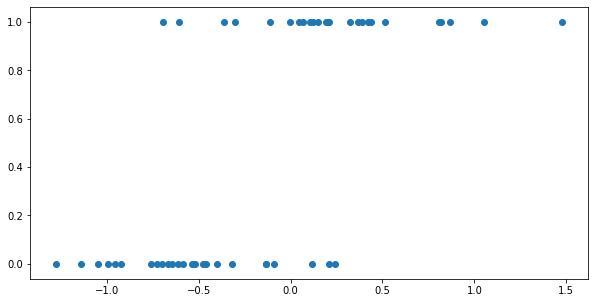

In [113]:
plt.figure(figsize=(10,5))
plt.scatter(x_class,y_class)

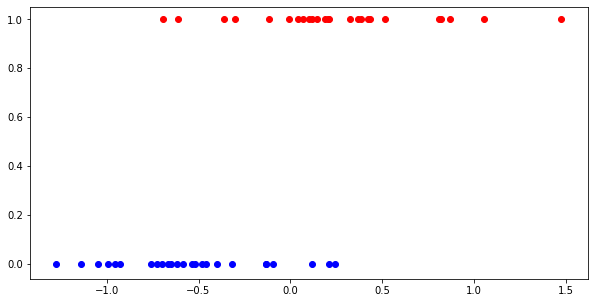

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(x_class[y_class==0],y_class[y_class==0],c='b')
plt.scatter(x_class[y_class==1],y_class[y_class==1],c='r')

In [20]:
def classification_visual(x,y):
    lr = LogisticRegression()
    lr.fit(x,y)
    xx = np.linspace(min(x),max(x),100).reshape(-1,1)
    yy = [prob[1] for prob in lr.predict_proba(xx)]
    
    plt.figure(figsize=(10,5))
    plt.scatter(x[y==0],y[y==0],c='b')
    plt.scatter(x[y==1],y[y==1],c='r')
    plt.plot(xx,yy)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


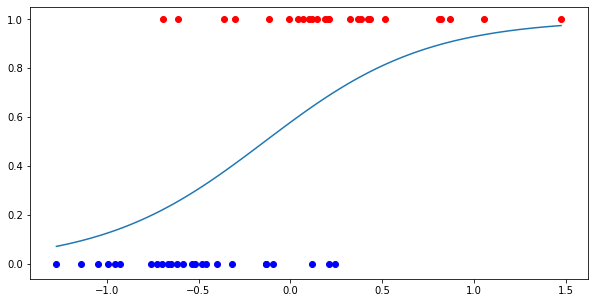

In [21]:
classification_visual(x_class,y_class)

In [59]:
def classification_visual_pred(x,y,threshold):
    lr = LogisticRegression()
    lr.fit(x,y)
    critical_value = (np.log(threshold/(1-threshold))-lr.intercept_[0])/lr.coef_[0][0]

    xx = np.linspace(min(x),max(x),100).reshape(-1,1)
    yy = [prob[1] for prob in lr.predict_proba(xx)]
    yy_2 = [1 if prob[1]>threshold else 0 for prob in lr.predict_proba(xx)]
    
    plt.figure(figsize=(10,5))
    plt.axhline(threshold,c='r',label=f'Prediction threshold: {threshold}')
    plt.axvline(critical_value,c='orange',linestyle='--')
    plt.scatter(x[x[:,0]<critical_value],y[x[:,0]<critical_value],c='b')
    plt.scatter(x[x[:,0]>critical_value],y[x[:,0]>critical_value],c='r')
    plt.plot(xx,yy,label=("Model's predicted probability"))

    plt.legend()

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


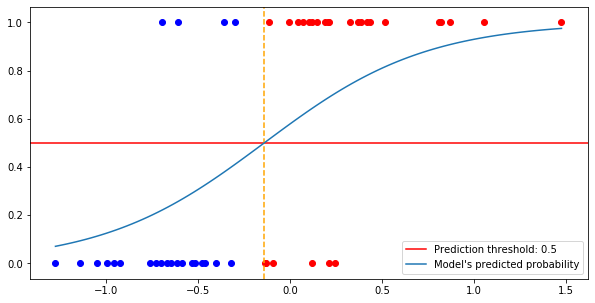

In [62]:
classification_visual_pred(x_class,y_class,.5)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(-0.7, 0.2, 'True Negatives: \n accurately classed')

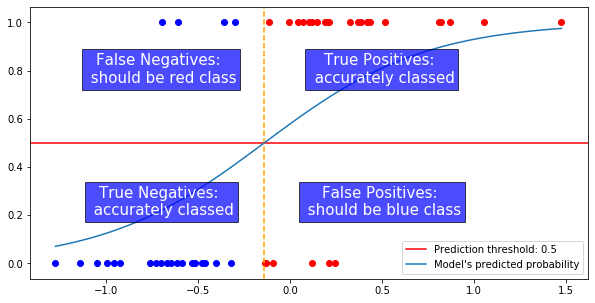

In [81]:
classification_visual_pred(x_class,y_class,.5)
plt.text(-.7,.75,'False Negatives: \n should be red class',horizontalalignment='center',c='w',fontsize=15,
         bbox=dict(facecolor='blue', alpha=0.7))
plt.text(.5,.2,'False Positives: \n should be blue class',horizontalalignment='center',c='w',fontsize=15,
        bbox=dict(facecolor='blue', alpha=0.7))
plt.text(.5,.75,'True Positives: \n accurately classed',horizontalalignment='center',c='w',fontsize=15,
        bbox=dict(facecolor='blue', alpha=0.7))
plt.text(-.7,.2,'True Negatives: \n accurately classed',horizontalalignment='center',c='w',fontsize=15,
        bbox=dict(facecolor='blue', alpha=0.7))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


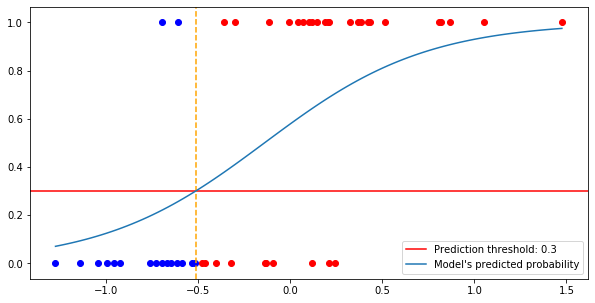

In [82]:
classification_visual_pred(x_class,y_class,.3)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


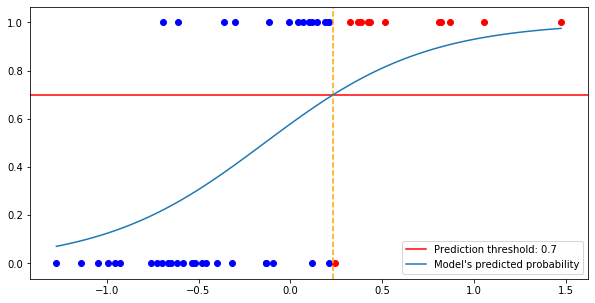

In [83]:
classification_visual_pred(x_class,y_class,.7)

Text(0, 0.5, 'True Positive Rate - Recall')

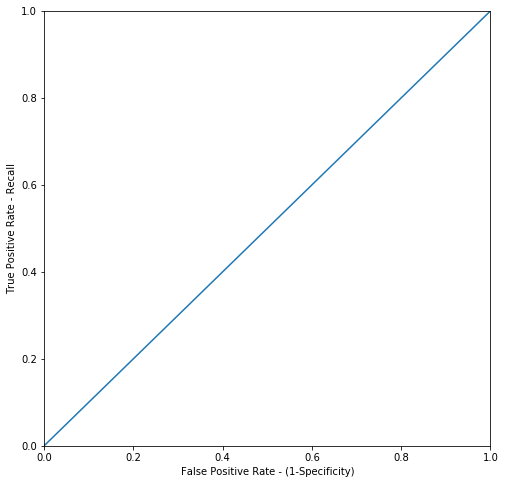

In [88]:
plt.figure(figsize=(8,8))
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(np.linspace(0,1,25),np.linspace(0,1,25))
plt.xlabel('False Positive Rate - (1-Specificity)')
plt.ylabel('True Positive Rate - Recall')



In [91]:
sum(x_class[y_class==1]>.2)[0]

13

In [141]:
def classification_roc(x,y,thresholds):
    lr = LogisticRegression()
    lr.fit(x,y)
    
    plt.figure(figsize=(8,8))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.plot(np.linspace(0,1,25),np.linspace(0,1,25))
    plt.xlabel('False Positive Rate - (1-Specificity)')
    plt.ylabel('True Positive Rate - Recall')
    
    colors = ['r','orange','green','b','purple','k']
    for i in range(0,len(thresholds)):
        n = thresholds[i]
        value = (np.log(n/(1-n))-lr.intercept_[0])/lr.coef_[0][0]
        TP = sum(x[y==1]>value)[0]
        FP = sum(x[y==0]>value)[0]
        TN = sum(x[y==0]<value)[0]
        FN = sum(x[y==1]<value)[0]
        
        recall = TP/(TP+FN)
        FPR = FP/(FP+TN)
        
        plt.scatter(FPR,recall,c=colors[i],label=f'Threshold: {n}')


    plt.legend(loc='lower right')

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


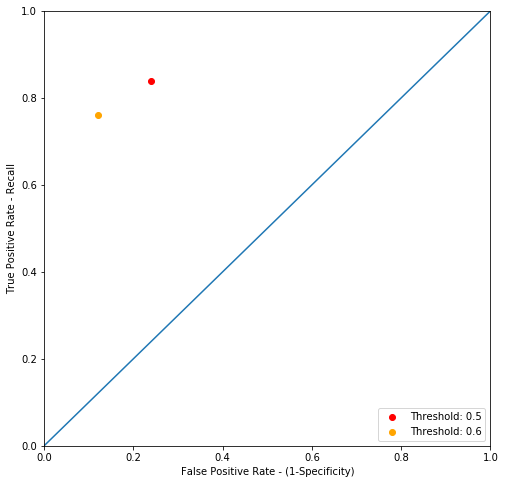

In [144]:
classification_roc(x_class,y_class,[.5,.6])

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


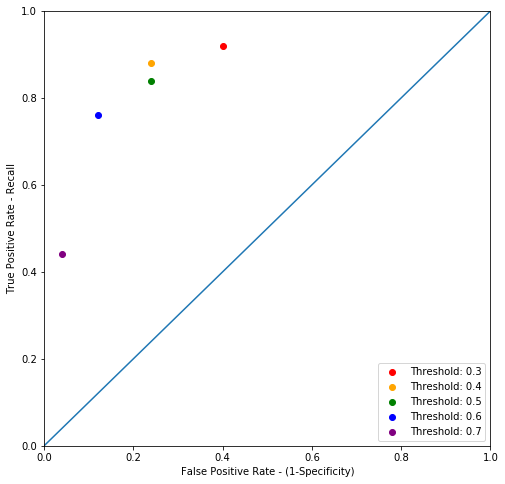

In [139]:
classification_roc(x_class,y_class,[.3,.4,.5,.6,.7])

In [145]:
def roc_curve(x,y):
    lr = LogisticRegression()
    lr.fit(x,y)
    
    plt.figure(figsize=(8,8))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.plot(np.linspace(0,1,25),np.linspace(0,1,25))
    plt.xlabel('False Positive Rate - (1-Specificity)')
    plt.ylabel('True Positive Rate - Recall')
    
    ROC_FPR = []
    ROC_recall = []
    
    for n in np.linspace(0,1,25):
        value = (np.log(n/(1-n))-lr.intercept_[0])/lr.coef_[0][0]
        TP = sum(x[y==1]>value)[0]
        FP = sum(x[y==0]>value)[0]
        TN = sum(x[y==0]<value)[0]
        FN = sum(x[y==1]<value)[0]
        ROC_FPR.append(FP/(FP+TN))
        ROC_recall.append(TP/(TP+FN))
    plt.plot(ROC_FPR,ROC_recall,label='ROC curve')
   


    plt.legend(loc='lower right')

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


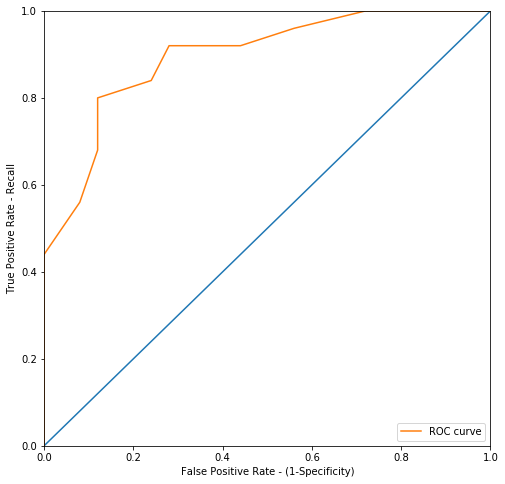

In [146]:
roc_curve(x_class,y_class)

In [127]:
critical_value = (np.log(threshold/(1-threshold))-lr.intercept_[0])/lr.coef_[0][0]

In [128]:
critical_value

0.8301356902328924

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


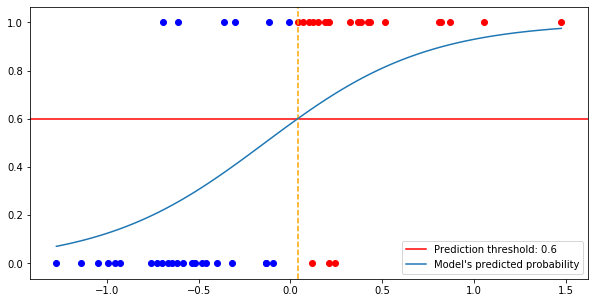

In [143]:
classification_visual_pred(x_class,y_class,.6)